#### Ing. Jorge Eduardo Ronsón Ruiz
#### jerondonr@unal.edu.co - 3012751445
#### Universidad Nacional de Colombia

# **<center> Red Neuronal de clasificación binaria</center>**

# 1. Importar librerias

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# 2. Cargar Datos

In [20]:
# Importing data
dataPath="/home/jorgerondon/Documentos/InteligenciaArtificial/DiplomadoIA/CuadernosJupyterJorgeE/datosCancerSeno/data.csv"
data = pd.read_csv(dataPath)
del data['Unnamed: 32'] #Elimina la columna "Unnamed: 32" que tiene valores NaN
data.shape

(569, 32)

In [21]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# 3. Preprocesamiento

In [22]:
x = data.iloc[:,2:].values # extrae como tensores numpy los datos de todas las filas pero de la columna 2 hasta la ultima columna
y = data.iloc[:,1].values #Extrae todas las filas de la columna 1. Note que esta columna contiene las etiquetas.

In [23]:
x.shape

(569, 30)

In [24]:
y.shape

(569,)

In [26]:
labelencoder_y = LabelEncoder() #Recodifica la variable objetivo
y = labelencoder_y.fit_transform(y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
x_test.shape #Note que la cantidad de files corresponden al 10% del total de datos como se indica en test_size.

(57, 30)

In [31]:
x_train.shape

(512, 30)

# 4. Normalización

In [32]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# 5. Creación del modelo

In [79]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,))) #El input_shape tiene 30 filas que concide con los features (columnas de los datos)
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 30% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid')) #Solo tiene una neurona de salida, ya que con esto es suficiente para realizar la clasificación de este problema.

# 6. Compilar modelo

In [80]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
classifier.summary()
plot_model(classifier, to_file='../Imagenes/cancer_seno.png', 
           show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


# 7. Entrenamiento del modelo

In [82]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 32ms/step - loss: 0.7245 - accuracy: 0.3961 - val_loss: 0.6134 - val_accuracy: 0.4660
Epoch 2/150
13/13 [==============================] - 0s 16ms/step - loss: 0.6135 - accuracy: 0.5086 - val_loss: 0.5327 - val_accuracy: 0.6893
Epoch 3/150
13/13 [==============================] - 0s 15ms/step - loss: 0.5341 - accuracy: 0.7408 - val_loss: 0.4697 - val_accuracy: 0.8447
Epoch 4/150
13/13 [==============================] - 0s 14ms/step - loss: 0.4680 - accuracy: 0.8680 - val_loss: 0.4172 - val_accuracy: 0.9029
Epoch 5/150
13/13 [==============================] - 0s 15ms/step - loss: 0.4221 - accuracy: 0.9120 - val_loss: 0.3682 - val_accuracy: 0.9126
Epoch 6/150
13/13 [==============================] - 0s 21ms/step - loss: 0.3670 - accuracy: 0.9315 - val_loss: 0.3204 - val_accuracy: 0.9417
Epoch 7/150
13/13 [==============================] - 0s 18ms/step - loss: 0.3294 - accuracy: 0.9389 - val_loss: 0.2733 - val_accuracy: 0.9612
Epoch 

# 8. Comprobación con datos de test

In [83]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred #Note que los valores de salida son continuos entre 0 y 1 debido a la función de activación: sigmoide
# de la capa de salida que se indico en la creación del modelo.

array([[1.00000000e+00],
       [3.62476110e-02],
       [1.07222135e-04],
       [2.32014060e-03],
       [2.83606983e-06],
       [1.00002326e-05],
       [3.44186742e-06],
       [8.24787458e-06],
       [2.39632641e-07],
       [1.99187533e-09],
       [1.32398486e-01],
       [7.58349895e-03],
       [9.25724422e-08],
       [7.29941905e-01],
       [7.58277178e-01],
       [1.00000000e+00],
       [6.92285994e-07],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998450e-01],
       [3.09824944e-04],
       [4.06448016e-05],
       [1.00000000e+00],
       [3.60711674e-05],
       [8.87985038e-07],
       [9.99860466e-01],
       [4.96184366e-05],
       [1.00000000e+00],
       [1.11613754e-05],
       [1.00000000e+00],
       [1.36405528e-02],
       [1.00000000e+00],
       [7.30454974e-10],
       [1.00000000e+00],
       [4.04188037e-03],
       [1.00000000e+00],
       [4.22507524e-04],
       [1.00000000e+00],


In [84]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0
y_pred # Se realiza una aproximación de los datos continuos a unicamente dos estados 1 ó 0 (cancer o noCancer)

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

# 9. Matriz de confusión

In [85]:
cm = confusion_matrix(y_test, y_pred)

In [86]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 96.49122807017544%


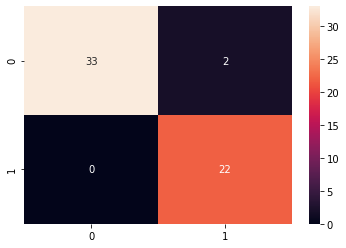

In [87]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

En el eje horizontal estan los datos que la red ha predecido, en el vertical los datos reales que han sido
etiquetadas. Se ve que el modelo clasifico 3 casos como cancer cuando no lo era cierto, es decir, tuvo 3 falsos positivos.

# 10. Evaluación del modelo

In [73]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

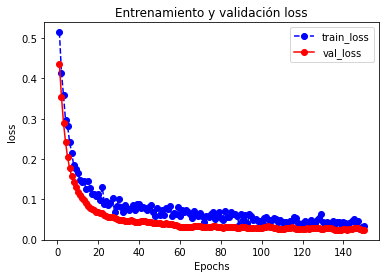

In [74]:
plot_metric(history, 'loss')

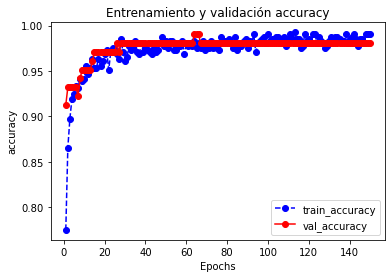

In [75]:
plot_metric(history, 'accuracy')

# 11. Mejoramiento del modelo:
De la gráfica de exactitud se puede llegar a pensar que existe un sobre ajuste de los datos, ya que en validación
se esta dando el mismo resultado a partir de aproximadamente 40 epocas. Para ello se procede a aumentar el dropout de 0.1 a 0.4 de la primer capa densa del modelo.

In [88]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,))) #El input_shape tiene 30 filas que concide con los features (columnas de los datos)
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.4)) # 30% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid')) #Solo tiene una neurona de salida, ya que con esto es suficiente para realizar la clasificación de este problema.

In [89]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
classifier.summary()
plot_model(classifier, to_file='../Imagenes/cancer_seno.png', 
           show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [91]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 35ms/step - loss: 0.7655 - accuracy: 0.4817 - val_loss: 0.6469 - val_accuracy: 0.6117
Epoch 2/150
13/13 [==============================] - 0s 14ms/step - loss: 0.6160 - accuracy: 0.6846 - val_loss: 0.5298 - val_accuracy: 0.8641
Epoch 3/150
13/13 [==============================] - 0s 10ms/step - loss: 0.5398 - accuracy: 0.7506 - val_loss: 0.4359 - val_accuracy: 0.9320
Epoch 4/150
13/13 [==============================] - 0s 13ms/step - loss: 0.4547 - accuracy: 0.8215 - val_loss: 0.3618 - val_accuracy: 0.9320
Epoch 5/150
13/13 [==============================] - 0s 15ms/step - loss: 0.4218 - accuracy: 0.8460 - val_loss: 0.3003 - val_accuracy: 0.9515
Epoch 6/150
13/13 [==============================] - 0s 15ms/step - loss: 0.3537 - accuracy: 0.8655 - val_loss: 0.2491 - val_accuracy: 0.9515
Epoch 7/150
13/13 [==============================] - 0s 22ms/step - loss: 0.3063 - accuracy: 0.9120 - val_loss: 0.2096 - val_accuracy: 0.9612
Epoch 

In [92]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred #Note que los valores de salida son continuos entre 0 y 1 debido a la función de activación: sigmoide
# de la capa de salida que se indico en la creación del modelo.

array([[9.9999958e-01],
       [2.1007448e-02],
       [1.4987588e-04],
       [3.0531287e-03],
       [3.6516786e-04],
       [5.7048306e-05],
       [6.8941612e-05],
       [2.9998708e-05],
       [1.4020530e-07],
       [1.5699770e-08],
       [2.1475881e-02],
       [3.1383067e-02],
       [2.8614145e-06],
       [3.1487262e-01],
       [1.1474955e-01],
       [1.0000000e+00],
       [1.6202577e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999952e-01],
       [9.9999869e-01],
       [3.2365322e-04],
       [1.5768409e-04],
       [1.0000000e+00],
       [2.0492176e-05],
       [7.0558076e-07],
       [9.9999863e-01],
       [6.2368796e-05],
       [1.0000000e+00],
       [1.8645718e-06],
       [1.0000000e+00],
       [4.2297125e-02],
       [1.0000000e+00],
       [3.7970460e-10],
       [1.0000000e+00],
       [4.9616098e-03],
       [1.0000000e+00],
       [6.0671568e-04],
       [1.0000000e+00],
       [9.9936211e-01],
       [6.383065

In [93]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0
y_pred # Se realiza una aproximación de los datos continuos a unicamente dos estados 1 ó 0 (cancer o noCancer)

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [94]:
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


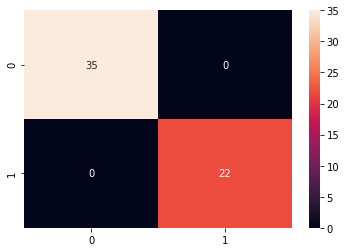

In [95]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [96]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

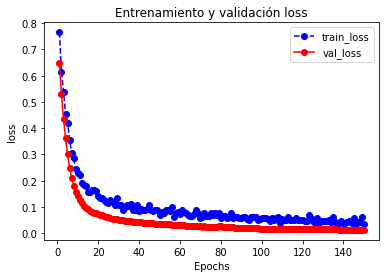

In [97]:
plot_metric(history, 'loss')

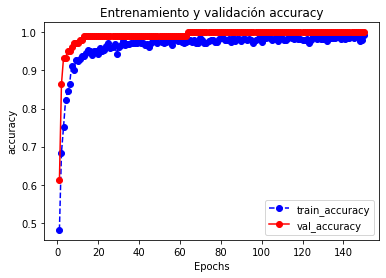

In [98]:
plot_metric(history, 'accuracy')